# Dataset  generation using Webots simulator

## Data log


## List of Instances 



In [3]:
""" Import """
import os, sys

import pcl

import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection

sys.path.append( os.path.abspath("../scripts") )
from utils import *

import pickle

import cv2

import rosbag
import sensor_msgs.point_cloud2 as pc2


""" Function """
def ros_to_pcl(ros_cloud):
    """ Converts a ROS PointCloud2 message to a pcl PointXYZRGB
    
        Args:
            ros_cloud (PointCloud2): ROS PointCloud2 message
            
        Returns:
            pcl.PointCloud_PointXYZRGB: PCL XYZRGB point cloud
    """
    points_list = []

    for data in pc2.read_points(ros_cloud, skip_nans=True):
        points_list.append([data[0], data[1], data[2]])

    pcl_data = pcl.PointCloud()
    pcl_data.from_list(points_list)

    return pcl_data


In [4]:
""" Data """
db = {}
db['world_ToyotaPriusSimple_circle'] = []

clusters: 12


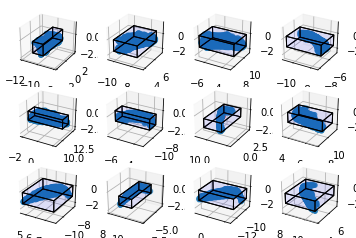

In [5]:
## file path
file_path = os.path.abspath('../webots/world_ToyotaPriusSimple_circle/2018-11-21-20-48-40.bag')

## load rosbag record file
bag = rosbag.Bag(file_path)
msgs = []
for topic, msg, t in bag.read_messages(topics=['/velodyne_points']):
    msgs.append(msg)

bag.close()

## Save to pcl point cloud data
pcl_cloud = ros_to_pcl(msgs[0])

""" remove ground """
np_cloud = np.asarray(pcl_cloud).copy()
np_cloud = np_cloud[np_cloud[:,2] > -1.3,:]
np_cloud = np_cloud[np_cloud[:,0] > -14,:]
np_cloud = np_cloud[np_cloud[:,0] < 14,:]
np_cloud = np_cloud[np_cloud[:,1] > -14,:]
np_cloud = np_cloud[np_cloud[:,1] < 14,:]

# %matplotlib qt
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')    
# resample_data = resample_point_cloud(np_cloud,0.1)
# display_point_cloud_box_ax(ax, resample_data)

del pcl_cloud
pcl_cloud = pcl.PointCloud(np_cloud.copy())
del np_cloud

""" statistical outlier filter """
# sof_filter = pcl_cloud.make_statistical_outlier_filter()
# sof_filter.set_mean_k (10)
# sof_filter.set_std_dev_mul_thresh (1.0)
# filtered_cloud = sof_filter.filter()

# del pcl_cloud
# pcl_cloud = filtered_cloud

# %matplotlib qt
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')    
# resample_data = resample_point_cloud(np.array(pcl_cloud),1.0)
# display_point_cloud_box_ax(ax, resample_data)

""" clustering """
tree = pcl_cloud.make_kdtree()

ec = pcl_cloud.make_EuclideanClusterExtraction()
ec.set_ClusterTolerance(0.2)
ec.set_MinClusterSize(50)
ec.set_MaxClusterSize(25000)
ec.set_SearchMethod(tree)
cluster_indices = ec.Extract()

clusters = []

for j, indices in enumerate(cluster_indices):

    points = np.zeros((len(indices), 3), dtype=np.float32)
    
    cluster = pcl.PointCloud()

    for i, indice in enumerate(indices):
        points[i,0] = pcl_cloud[indice][0] * -1.
        points[i,1] = pcl_cloud[indice][1]
        points[i,2] = pcl_cloud[indice][2]
               
    clusters.append(points)
    
print "clusters:", len(clusters)

""" Visualization """

fig = plt.figure()
for i in range( len( clusters ) ):
    ctr = i+1
    ax = fig.add_subplot(3,4,ctr, projection='3d')
    resample_data = resample_point_cloud(clusters[i],1.0)
    display_point_cloud_box_ax(ax, resample_data)


In [7]:
for cloud in clusters:
   db['world_ToyotaPriusSimple_circle'].append(cloud)

In [43]:
theta = np.arange(16) * np.pi * 2. / 16. + np.pi * 1. / 16.
mat_cal = np.zeros((16,3))
radius = 10.
mat_cal[:,0] = radius * np.sin(theta).T
mat_cal[:,1] = 0.3 * np.ones((16))
mat_cal[:,2] = radius * np.cos(theta).T

# print mat_cal
# print 10. * np.sin(theta).T

# print "``````````````````"
# print 10. * np.cos(theta).T


for i in range(16):
    print "ToyotaPriusSimple {"
    print "  translation {} {} {}".format(mat_cal[i,0], mat_cal[i,1], mat_cal[i,2])
    print "  name \"vehicle({})\" ".format(i)
    print "}"

ToyotaPriusSimple {
  translation 1.95090322016 0.3 9.80785280403
  name "vehicle(0)" 
}
ToyotaPriusSimple {
  translation 5.5557023302 0.3 8.31469612303
  name "vehicle(1)" 
}
ToyotaPriusSimple {
  translation 8.31469612303 0.3 5.5557023302
  name "vehicle(2)" 
}
ToyotaPriusSimple {
  translation 9.80785280403 0.3 1.95090322016
  name "vehicle(3)" 
}
ToyotaPriusSimple {
  translation 9.80785280403 0.3 -1.95090322016
  name "vehicle(4)" 
}
ToyotaPriusSimple {
  translation 8.31469612303 0.3 -5.5557023302
  name "vehicle(5)" 
}
ToyotaPriusSimple {
  translation 5.5557023302 0.3 -8.31469612303
  name "vehicle(6)" 
}
ToyotaPriusSimple {
  translation 1.95090322016 0.3 -9.80785280403
  name "vehicle(7)" 
}
ToyotaPriusSimple {
  translation -1.95090322016 0.3 -9.80785280403
  name "vehicle(8)" 
}
ToyotaPriusSimple {
  translation -5.5557023302 0.3 -8.31469612303
  name "vehicle(9)" 
}
ToyotaPriusSimple {
  translation -8.31469612303 0.3 -5.5557023302
  name "vehicle(10)" 
}
ToyotaPriusSimpl

In [4]:
""" Bike """
root_path = os.path.abspath('../webots/bikes/')

bikes_list = []
bikes_list.append('world_MotorbikeSimple')
bikes_list.append('world_ScooterSimple')

idx = 1

file_path = os.path.join(root_path, bikes_list[idx])
image_path = os.path.join( os.path.abspath('../image') ,bikes_list[idx] + '.png')

In [6]:
point_cloud_path = os.path.join(file_path, 'PointCloud_0.bin')

file_p_list = FnParsePointCloudFile( point_cloud_path )

pcl_cloud = GetPointCloudFromFile(point_cloud_path, file_p_list, 0)

In [14]:
""" statistical outlier filter """
pcl_cloud = GetPointCloudFromFile(point_cloud_path, file_p_list, 0)

sof_filter = pcl_cloud.make_statistical_outlier_filter()
sof_filter.set_mean_k (10)
sof_filter.set_std_dev_mul_thresh (0.1)
filtered_cloud = sof_filter.filter()

del pcl_cloud
pcl_cloud = filtered_cloud

tree = pcl_cloud.make_kdtree()

ec = pcl_cloud.make_EuclideanClusterExtraction()
ec.set_ClusterTolerance(0.3)
# ec.set_ClusterTolerance(0.5) # --> for world_MotorbikeSimple
# ec.set_ClusterTolerance(0.6) # --> for world_TruckSimple
ec.set_MinClusterSize(50)
# ec.set_MinClusterSize(60) # --> for world_Pedestrian
ec.set_MaxClusterSize(25000)
ec.set_SearchMethod(tree)
cluster_indices = ec.Extract()

clusters = []

for j, indices in enumerate(cluster_indices):

    points = np.zeros((len(indices), 3), dtype=np.float32)
    
    cluster = pcl.PointCloud()

    for i, indice in enumerate(indices):
        points[i,0] = pcl_cloud[indice][0] * -1.
        points[i,1] = pcl_cloud[indice][1]
        points[i,2] = pcl_cloud[indice][2]
               
    clusters.append(points)
    
    print len(points)
    
print "clusters:", len(clusters)

image = cv2.imread(image_path)
cv2.imshow('img', image)
%matplotlib qt

plt.close("all")
display_point_cloud_8_image(clusters, 1.0, image)
        

564
554
271
231
210
204
202
173
clusters: 8


In [21]:
""" Bike """
""" Data arrangement """
%matplotlib qt
plt.close("all")
image = cv2.imread(image_path)
# clusters_to_save = np.array(clusters)[[6, 2, 5, 1, 0, 4, 3, 7]] # world_MotorbikeSimple
clusters_to_save = np.array(clusters)[[3, 2, 7, 0, 1, 6, 5, 4]] # world_ScooterSimple

display_point_cloud_8_image(clusters_to_save, 1.0, image)

In [22]:
""" Bikes """
""" Load and save pickle """

## Load pickle
data_path = os.path.abspath('../dataset/db_v4_20181031.pickle')

with open(data_path, 'rb') as f:
    db = pickle.load(f)
    
db_add_truck = db

db_add_truck[bikes_list[idx]] = []
for cloud in clusters_to_save:
    db_add_truck[bikes_list[idx]].append(cloud)
    
with open('db_v4_20181031.pickle', 'wb') as f:
    pickle.dump(db_add_truck, f)

In [24]:
""" Load pickle and display """

image = cv2.imread(image_path)

# %matplotlib inline
## Load pickle
with open('db_v4_20181031.pickle', 'rb') as f:
    db = pickle.load(f)
%matplotlib qt

# display_point_cloud_8_image(db[cars_list[idx]], 0.1, image)
# for i in range(len(db)):
plt.close('all')
display_point_cloud_8_image(db[bikes_list[1]], 1., image)
print bikes_list[0]

world_MotorbikeSimple
